In this notebook I will implemented one full forward pass. The structure to follow will be :

Layer Dense --> ReLU --> Layer_Dense --> Softmax --> Loss

## 1. The Input

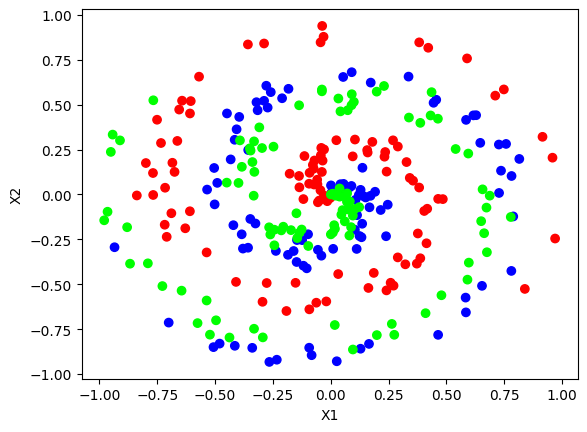

In [188]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

X,y = spiral_data(samples=100,classes=3)

plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [189]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


## 2. Making the Dense Layer

In [190]:
import numpy as np

class Dense_layer:
    def __init__(self,input_shape,no_neurons): # no_neurons is basically the output
        self.weights = np.random.rand(input_shape,no_neurons)  # Initializing the weights (rand function creates a distrubution between 0 and 1)
        self.bias = np.random.rand(no_neurons) # Initializing the biases
    
    def forward(self,inputs):
        
        self.acc_output = np.dot(inputs,self.weights)  

In [191]:
class Activation_Function:
    
    @staticmethod
    def relu(inputs):
        return np.maximum(0,inputs)
    
    @staticmethod  
    def tanh(inputs):
        out1 = ( np.exp(inputs) - np.exp(-inputs)) / (np.exp(inputs) + np.exp(-inputs))
        
        exp_x = np.exp(inputs)
        exp_neg_x = np.exp(-inputs)
        out2 = (exp_x - exp_neg_x) / (exp_x + exp_neg_x)  # Manual tanh formula
        
        out3 = np.tanh(inputs)
        return out1,out2,out3
        

In [192]:
d = Dense_layer(2,4)

d.forward(X)

d.acc_output[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00437932, 0.00938387, 0.00050914, 0.01052114],
       [0.01212668, 0.01834567, 0.00132612, 0.02038645],
       [0.02000175, 0.01571959, 0.00202795, 0.01697592],
       [0.02713662, 0.0235835 , 0.00277608, 0.02561541]], dtype=float32)

In [193]:
act = Activation_Function()

out1,out2,act_out = act.tanh(d.acc_output)

In [194]:
out1[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00437932, 0.00938356, 0.00050911, 0.01052077],
       [0.01212606, 0.01834361, 0.00132614, 0.02038362],
       [0.01999914, 0.01571831, 0.00202795, 0.0169743 ],
       [0.02712997, 0.02357912, 0.00277611, 0.02560985]], dtype=float32)

In [195]:
out2[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00437932, 0.00938356, 0.00050911, 0.01052077],
       [0.01212606, 0.01834361, 0.00132614, 0.02038362],
       [0.01999914, 0.01571831, 0.00202795, 0.0169743 ],
       [0.02712997, 0.02357912, 0.00277611, 0.02560985]], dtype=float32)

In [196]:
act_out[:5]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.0043793 , 0.0093836 , 0.00050914, 0.01052075],
       [0.01212609, 0.01834362, 0.00132612, 0.02038363],
       [0.01999908, 0.01571829, 0.00202795, 0.01697429],
       [0.02712996, 0.02357913, 0.00277607, 0.02560981]], dtype=float32)

## 3. Implementing the SoftMax function

In [197]:
class SoftMax_Mine:
    
    @staticmethod
    def apply(outputs):
        return np.exp(outputs - np.max(outputs,axis=1,keepdims=True)) /  np.sum(np.exp(outputs- np.max(outputs,axis=1,keepdims=True)),axis=1,keepdims=True)    
        

In [198]:
%run 3.Activation_Layers.ipynb

(2, 4)
[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]]
(2, 4)
(300, 2)
(300,)
(2, 3)
(2, 3)
[[0.         0.         0.        ]
 [0.         0.         0.00012475]
 [0.         0.         0.00025709]
 [0.         0.         0.0002559 ]
 [0.         0.         0.00037327]]
[[0.33333334 0.33333334 0.33333334]
 [0.3333131  0.33331382 0.33337313]
 [0.33328262 0.33328345 0.33343393]
 [0.33325994 0.33325908 0.33348092]
 [0.33323216 0.33323133 0.33353645]]
[[inf inf inf]]
[[0.33333334 0.33333334 0.33333334]
 [0.3333131  0.33331382 0.33337313]
 [0.33328265 0.33328348 0.33343393]
 [0.33325997 0.33325908 0.33348095]
 [0.33323216 0.33323136 0.33353645]]


C:\Users\loghi\AppData\Local\Temp\ipykernel_24192\2469880408.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(inputs))  # This can cause an overflow error --> Therefore we subtract with the maximum value for numberical stability --> a^(n - m) = a^n/a^m


In [199]:
obj1 =SoftMax()

In [200]:
obj1.forward(act_out)
print(obj1.output[:5])

[[0.25       0.25       0.25       0.25      ]
 [0.24954367 0.2507956  0.24857977 0.25108096]
 [0.24976356 0.2513213  0.24708065 0.2518345 ]
 [0.2515788  0.25050417 0.24709806 0.250819  ]
 [0.25183356 0.25094092 0.24577451 0.25145105]]


In [201]:
SoftMax_Mine.apply(act_out)[:5]

array([[0.25      , 0.25      , 0.25      , 0.25      ],
       [0.24954367, 0.2507956 , 0.24857977, 0.25108096],
       [0.24976356, 0.2513213 , 0.24708065, 0.2518345 ],
       [0.2515788 , 0.25050417, 0.24709806, 0.250819  ],
       [0.25183356, 0.25094092, 0.24577451, 0.25145105]], dtype=float32)

# 4. Implementing the Loss Function

**Critical Notes on Cross-Entropy Loss**

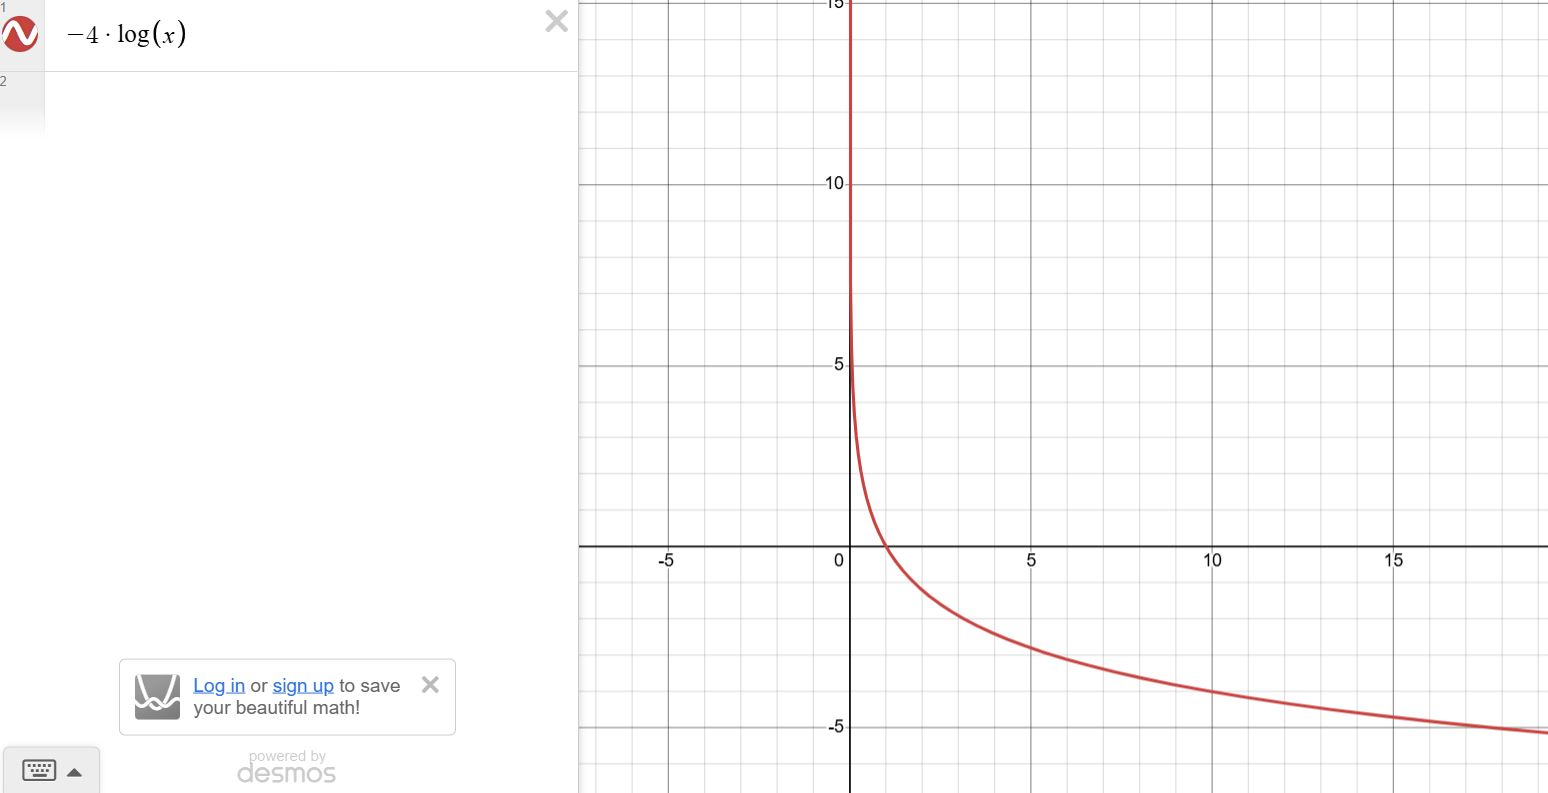

### **Understanding Cross-Entropy Loss**
Cross-entropy loss is commonly used in **classification problems** where the target labels are either **0 or 1**. It works by multiplying the true label with the **negative log** of the predicted probability, effectively acting as a **selector** to determine which log value to compute.

### **Key Insights:**
- Since softmax outputs probabilities between **0 and 1**, cross-entropy ensures that the correct class is encouraged while penalizing incorrect predictions.
- When the predicted probability (**q**) for the correct class is **close to 1**, the loss value (**-log(q)**) is **small**—indicating a confident and correct prediction.
- When the predicted probability is **low** (closer to 0), the loss value **increases exponentially** (as seen in the graph), meaning the model is heavily penalized for wrong, confident predictions.
- The function is **asymptotic near 0**, meaning **very low probabilities lead to extremely high losses**—forcing the model to avoid making extreme mistakes.

This mechanism ensures that the neural network not only makes correct predictions but also **learns to be confident in its decisions**.

In [210]:
class Cross_Entropy_Loss:
    
    @staticmethod
    def apply(soft_out,true_labels):
        
        soft_out = np.clip(soft_out,1e-7,1-1e-7)
        
        # Only consider the classes which are true labelled as 1 or higher
        if len(true_labels.shape) == 1: # Direct categorical values given

            return np.mean(-np.log(soft_out[range(len(soft_out)),y]))
     
        elif true_labels.shape[1] == 3: # One hot encoding
            
            masked_values = - np.log(np.sum(true_labels*soft_out,axis=
                                            1,keepdims=True))
            
            return np.mean(masked_values)
    

In [211]:
%run 4.Loss_Functions.ipynb

Target is one-hot encoded
Target indices given for each output


# 5. Putting everything together

In [216]:
dense_layer1 = Dense_layer(2,4)
dense_layer2 = Dense_layer(4,3)

dense_layer1.forward(X)
activation1 = Activation_Function.relu(dense_layer1.acc_output)

dense_layer2.forward(activation1)
activation2 = Activation_Function.relu(dense_layer2.acc_output)
softmax1 = SoftMax_Mine.apply(activation2)

loss = Cross_Entropy_Loss.apply(softmax1,y)

In [217]:
np.unique(obj1.output)

array([0.15469287, 0.15662025, 0.15682656, ..., 0.3743071 , 0.37710604,
       0.37813696], dtype=float32)

In [218]:
softmax1.shape

(300, 3)

In [219]:
loss

1.1026319